In [14]:
import os, glob
import numpy as np
from pyproj import CRS
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt
import pandas as pd
import json
from zipfile import ZipFile
#from scipy.signal import medfilt2d
from rasterstats import zonal_stats



In [15]:
country_code_mapping = {
    'AFG': 'AF',  # Afghanistan
    'AGO': 'AO',  # Angola
    'BDI': 'BY',  # Burundi
    'BFA': 'UV',  # Burkina Faso
    'CAF': 'CT',  # Central African Republic
    'CHN': 'CH',  # China
    'COD': 'CG',  # Congo, Democratic Republic (Kinshasa)
    'COG': 'CF',  # Congo, Republic (Brazzaville)
    'COL': 'CO',  # Colombia
    'DJI': 'DJ',  # Djibouti
    'EGY': 'EG',  # Egypt
    'ETH': 'ET',  # Ethiopia
    'GHA': 'GH',  # Ghana
    'GIN': 'GV',  # Guinea
    'GTM': 'GT',  # Guatemala
    'HND': 'HO',  # Honduras
    'HTI': 'HA',  # Haiti
    'IND': 'IN',  # India
    'IRQ': 'IZ',  # Iraq
    'KEN': 'KE',  # Kenya
    'LBN': 'LE',  # Lebanon
    'LBR': 'LI',  # Liberia
    'MDG': 'MA',  # Madagascar
    'MLI': 'ML',  # Mali
    'MOZ': 'MZ',  # Mozambique
    'MWI': 'MI',  # Malawi
    'NER': 'NG',  # Niger
    'NGA': 'NI',  # Nigeria
    'PAK': 'PK',  # Pakistan
    'PHL': 'RP',  # Philippines
    'SDN': 'SU',  # Sudan
    'SLE': 'SL',  # Sierra Leone
    'SOM': 'SO',  # Somalia
    'SSD': 'OD',  # South Sudan
    'SYR': 'SY',  # Syria
    'TCD': 'CD',  # Chad
    'TUR': 'TU',  # Turkey
    'TZA': 'TZ',  # Tanzania
    'UGA': 'UG',  # Uganda
    'UKR': 'UP',  # Ukraine
    'VEN': 'VE',  # Venezuela
    'YEM': 'YM',  # Yemen
    'ZAF': 'SF',  # South Africa
    'ZMB': 'ZA',  # Zambia
    'ZWE': 'ZI',  # Zimbabwe
}


# Download Geoboundaries

<AxesSubplot:>

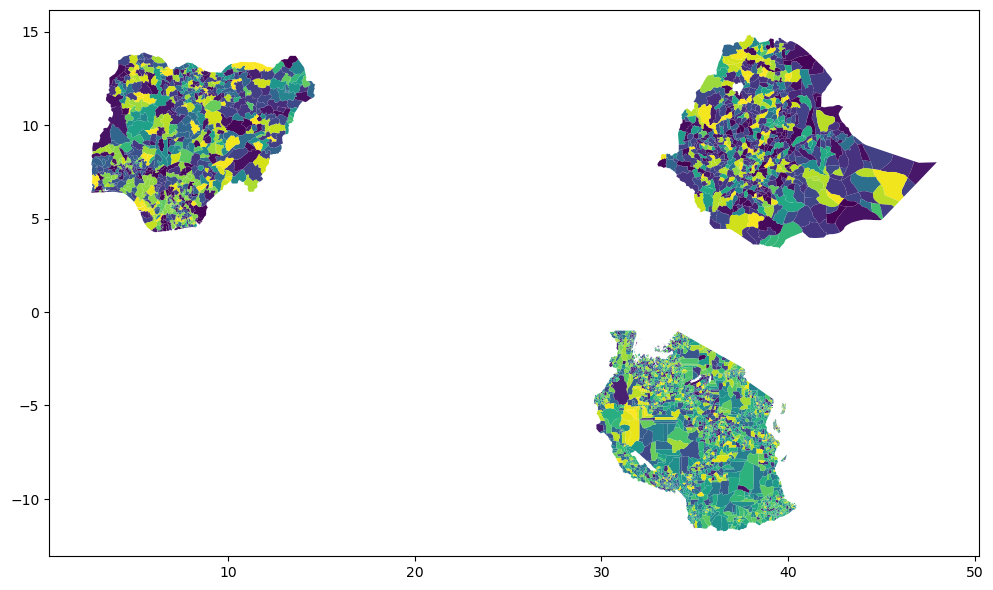

In [3]:
import geopandas as gpd
import pandas as pd
import requests

three_main = {
    'TZA': 'ADM3',
    'ETH': 'ADM3',
    'NGA': 'ADM2',
    'UGA': 'ADM3'
}

geoconcat = []

for country_code, adm_level in three_main.items():
    print(f"Downloading {country_code} at {adm_level} level...")
    r = requests.get(f"https://www.geoboundaries.org/api/current/gbOpen/{country_code}/{adm_level}/")
    
    # Check if the response is valid
    if r.status_code != 200:
        print(f"Failed to get metadata for {country_code}")
        continue

    dlPath = r.json().get('gjDownloadURL')
    if not dlPath:
        print(f"No download URL found for {country_code}")
        continue

    geoBoundary = requests.get(dlPath).json()
    
    # Load to GeoDataFrame
    geodf = gpd.GeoDataFrame.from_features(
        geoBoundary['features'],
        crs=geoBoundary['crs']['properties']['name']
    )
    geodf['country'] = country_code
    geoconcat.append(geodf)

# Concatenate all countries
geo_df = pd.concat(geoconcat)
geo_df = geo_df.to_crs("EPSG:4326")

# Plot example
geo_df.plot(column='shapeName', cmap='viridis', figsize=(12, 10))


In [ ]:
import os
import shutil

folder_A = 'C:\\Users\\ck24\\OneDrive - University of Illinois - Urbana\\Documents\\price_nutrition\\stores\\raw\\weather\\chirps'
folder_B = 'C:\\Users\\ck24\\OneDrive - University of Illinois - Urbana\\Documents\\geospatial_data_collection\\stores\\raw\\chirps'

# Make sure folder_B exists
os.makedirs(folder_B, exist_ok=True)

# Move all .tif files
for file in os.listdir(folder_A):
    if file.endswith(".tif"):
        src_path = os.path.join(folder_A, file)
        dst_path = os.path.join(folder_B, file)
        shutil.move(src_path, dst_path)

print("✅ All .tif files moved from A to B.")
